<h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Final Project</h1></center>

<b>Conrado Santos Boeira</b>  
B00913115

# Importing Libraries and Loading the Dataset <a id='top'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import torch
from torch import nn, optim
import torch.utils.data as data_utils

In [2]:
# Taken from tutorial 2 ref[1]
# Set options to avoid truncation when displaying a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
# Set floating point numbers to be displayed with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 15
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("../train.csv")
df_original= df.copy()
df.columns = df.columns.str.replace(' ', '')
df.head(5)

/tmp/ipykernel_1002966/4276161428.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../train.csv")


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

# Basic Data Understanding

In [4]:
# Collect some stats on the dataset
print("Total number of matches: ", len(df))
print("Number of leagues: ", df['league_name'].nunique())
print("Number of different home teams: ", df['home_team_name'].nunique())
print("Number of different away teams: ", df['away_team_name'].nunique())

# Find oldest and newest match record
df['match_date'] = pd.to_datetime(df['match_date'])
print("Oldest match recorded: ", df['match_date'].min())
print("Newest match recorded: ", df['match_date'].max())

Total number of matches:  110938
Number of leagues:  727
Number of different home teams:  9813
Number of different away teams:  9892
Oldest match recorded:  2019-12-01 00:45:00
Newest match recorded:  2021-05-01 00:00:00


['Premier League', 'Club Friendlies', 'Primera Division', 'Super League', '3. Liga', 'Ligue 1', 'Championship', 'League One', 'Superliga', 'Serie A']


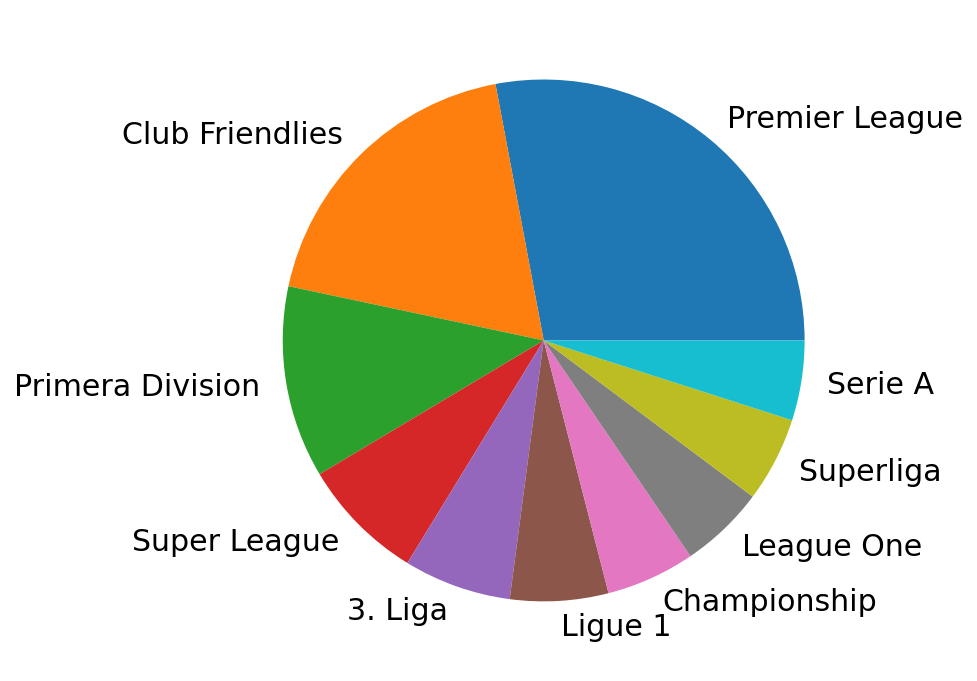

In [5]:
# Checking most common leagues
most_common_leagues = df['league_name'].value_counts()[:10]
# Create pie plot
vals = most_common_leagues.values
labels = most_common_leagues.keys().tolist()
print(labels)

plt.pie(vals, labels = labels)
plt.show()
print()


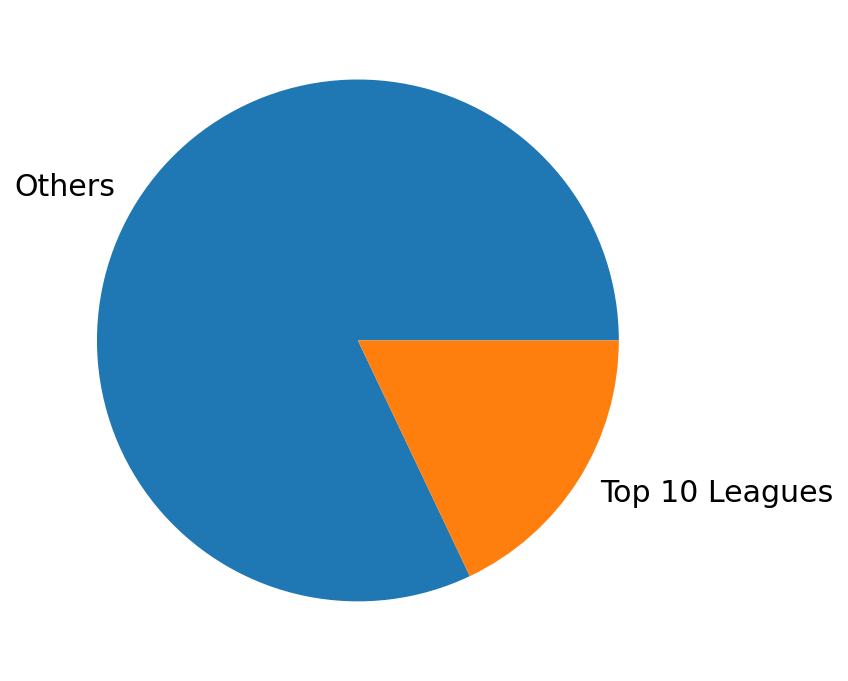

In [6]:
others = len(df) - sum(most_common_leagues)
# Create pie plot
vals = [others,sum(most_common_leagues)]
labels = ["Others", "Top 10 Leagues"]

plt.pie(vals, labels = labels)
plt.show() 

<BarContainer object of 3 artists>

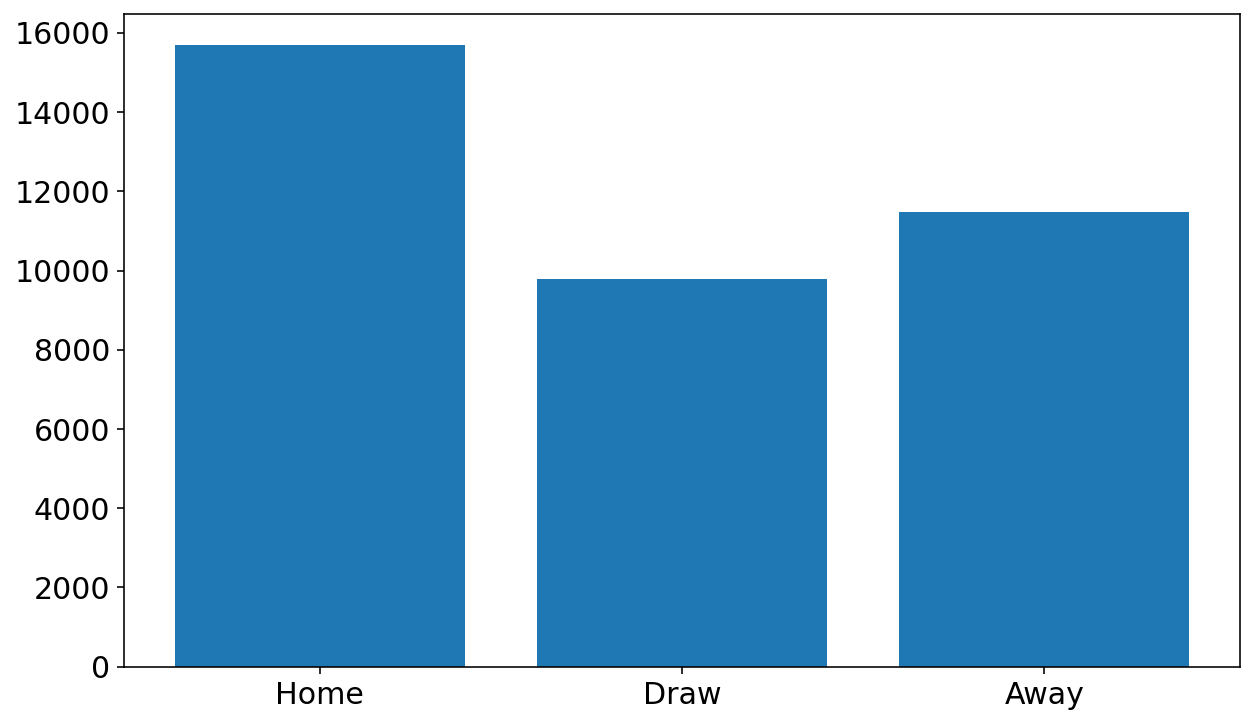

In [25]:
unique, counts = np.unique(y_train, return_counts=True)
labels =  ['Home', 'Draw', "Away"]
plt.bar(labels,counts)

# Data Pre-Processing

#### Remove some "outlier" leagues and name columns

In [7]:
df = df.dropna()
name_leagues = df['league_name'].unique()
removed_leagues = [c for c in name_leagues if 'U20' in c or "U19" in c or "U23" in c 
                   or "Friendly" in c or "Friendlies" in c]
league_matches = df.groupby(['league_name']).size()
for league in league_matches.index:
    if(league_matches[league] < 100):
        removed_leagues.append(league)
df = df[~df['league_name'].isin(removed_leagues)]
name_leagues = df['league_name'].unique()

In [8]:
non_name_cols = [c for c in df.columns if 'name' not in c]
df = df[non_name_cols]

#### Process data checking for coach changes

In [9]:
home_team_changed_coach = []
away_team_changed_coach = []
coach_columns = [c for c in df.columns if 'coach' in c]

for index, row in df.iterrows():
    home_coach_id = row["home_team_coach_id"]
    away_coach_id = row["away_team_coach_id"]
    home_changed = False
    away_changed = False
    for i in range(10,0,-1):
        home_coach = row["home_team_history_coach_{}".format(i)]
        if(home_coach != home_coach_id): home_changed = True
        away_coach = row["away_team_history_coach_{}".format(i)]
        if(away_coach != away_coach_id): away_changed = True
        
        
        
    home_team_changed_coach.append(int(home_changed))
    away_team_changed_coach.append(int(away_changed))

df["home_team_changed_coach"] = home_team_changed_coach
df["away_team_changed_coach"] = away_team_changed_coach

df = df.drop(coach_columns,1)

/tmp/ipykernel_1002966/1771984552.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(coach_columns,1)


#### Process match schedules in order to get the average number of rest days and the number of trips

In [10]:
home_team_avg_rest_days = []
away_team_avg_rest_days = []

for index, row in df.iterrows():
    home_rest = 0
    away_rest = 0
    home_curr_value = None
    away_curr_value = None
    for i in range(10,0,-1):
        home_val = pd.to_datetime(row["home_team_history_match_date_{}".format(i)])
        if(home_curr_value):
            home_rest += (home_val - home_curr_value).days
        home_curr_value = home_val
        
        away_val = pd.to_datetime(row["away_team_history_match_date_{}".format(i)])
        if(away_curr_value):
            away_rest += (away_val - away_curr_value).days
        away_curr_value = away_val
        
        
    # add the last trip to current game if needed
    home_rest += (row["match_date"]- home_curr_value).days
    away_rest += (row["match_date"]- away_curr_value).days
        
    home_team_avg_rest_days.append(home_rest/10)
    away_team_avg_rest_days.append(away_rest/10)

df["home_team_avg_rest_days"] = home_team_avg_rest_days
df["away_team_avg_rest_days"] = away_team_avg_rest_days

date_columns = [c for c in df.columns if 'match_date' in c]
df = df.drop(date_columns,1)


/tmp/ipykernel_1002966/3761434520.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(date_columns,1)


In [12]:
# Clean up history of home vs away games
home_team_trips = []
away_team_trips = []

for index, row in df.iterrows():
    home_trips = 0
    away_trips = 0
    home_curr_value = -1
    away_curr_value = -1
    for i in range(10,0,-1):
        home_val = row["home_team_history_is_play_home_{}".format(i)]
        if(home_val != home_curr_value and home_curr_value != -1):
            home_trips += 1
        home_curr_value = home_val
        
        away_val = row["away_team_history_is_play_home_{}".format(i)]
        if(away_val != away_curr_value and away_curr_value != -1):
            away_trips += 1
        away_curr_value = away_val
        
    # add the last trip to current game if needed
    if(home_curr_value == 0): home_trips += 1
    if(away_curr_value == 1): away_trips += 1
        
    home_team_trips.append(home_trips)
    away_team_trips.append(away_trips)

df["home_team_trips"] = home_team_trips
df["away_team_trips"] = away_team_trips

home_team_games = [c for c in df.columns if c.startswith("home_team_history_is_play_home")]
away_team_games = [c for c in df.columns if c.startswith("away_team_history_is_play_home")]

#df = df.drop(home_team_games,1)
#df = df.drop(away_team_games,1)

#### Get average number of goals per league and calculate goal diferential and attack/defence rate

In [13]:
total_team_goals = {}
number_of_values = {}
df = df.dropna()

for index, row in df.iterrows():
    for i in range(1,11):
        # Only counting scored goals as, if we assume all matches in the season have been saved
        # we can assume that the goals the opponent scored would show up in a different measurement
        goals = row["home_team_history_goal_{}".format(i)]
        league = row["home_team_history_league_id_{}".format(i)]
        
        if(league in total_team_goals):
            total_team_goals[league] += goals
            number_of_values[league] += 1 
        else:
            total_team_goals[league] = goals
            number_of_values[league] = 1 
            
        goals = row["away_team_history_goal_{}".format(i)]
        league = row["away_team_history_league_id_{}".format(i)]
        
        if(league in total_team_goals):
            total_team_goals[league] += goals
            number_of_values[league] += 1 
        else:
            total_team_goals[league] = goals
            number_of_values[league] = 1 
        

avg_goals = {}
avg_goal_per_league = 0
for league in total_team_goals.keys():
    avg_goals[league] = total_team_goals[league]/number_of_values[league]
    avg_goal_per_league += total_team_goals[league]/number_of_values[league]
avg_goal_per_league = avg_goal_per_league/len(total_team_goals)
print("Avg amount of goals per league: {}".format(avg_goal_per_league))

Avg amount of goals per league: 1.5416219093658718


In [14]:
# Convert goals scored and conceded into goal difference
home_gd = []
home_attack_rate = []
home_defense_rate= []
away_gd = []
away_attack_rate = []
away_defense_rate= []
count = 0
for index, row in df.iterrows():
    league = row["league_id"]
    if(league not in avg_goals):
        home_attack_rate.append(np.nan)
        home_defense_rate.append(np.nan)
        away_attack_rate.append(np.nan)
        away_defense_rate.append(np.nan)
        home_gd.append(np.nan)
        away_gd.append(np.nan)
        continue
    h_g_score = 0
    h_g_concede = 0
    a_g_score = 0
    a_g_concede = 0
    for i in range(1,11):
        h_g_score   += row["home_team_history_goal_{}".format(i)]
        h_g_concede += row["home_team_history_opponent_goal_{}".format(i)]
        a_g_score   += row["away_team_history_goal_{}".format(i)]
        a_g_concede += row["away_team_history_opponent_goal_{}".format(i)]
    
    # If there is any league with avg goal of 0 (maybe only a single 0x0 game in the dataset)
    # we are setting the value to be the average for the number of goals scored in a league game
    if(avg_goals[league] == 0):
        avg_goals[league] = avg_goal_per_league
        
    home_attack = ((h_g_score)/10)/avg_goals[league]
    home_defense = ((h_g_concede)/10)/avg_goals[league]
    away_attack = ((a_g_score)/10)/avg_goals[league]
    away_defense = ((a_g_concede)/10)/avg_goals[league]
    
    home_attack_rate.append(home_attack)
    home_defense_rate.append(home_defense)
    away_attack_rate.append(away_attack)
    away_defense_rate.append(away_defense)
    
    h_gd = h_g_score-h_g_concede
    a_gd = a_g_score-a_g_concede
        
    home_gd.append(h_gd)
    away_gd.append(a_gd)

df["home_team_goal_difference"] = home_gd
df["home_attack_rate"] = home_attack_rate
df["home_defense_rate"] = home_defense_rate
df["away_team_goal_difference"] = away_gd
df["away_attack_rate"] = away_attack_rate
df["away_defense_rate"] = away_defense_rate

home_gd_games = [c for c in df.columns if c.startswith("home_team_history_goal") or c.startswith("home_team_history_opponent_goal")]
away_gd_games = [c for c in df.columns if c.startswith("away_team_history_goal") or c.startswith("away_team_history_opponent_goal")]

#df = df.drop(home_gd_games,1)
#df = df.drop(away_gd_games,1)

#### Drop unnecessary columns (id,cup) and change target format

In [15]:
id_cols = [c for c in df.columns if '_id' in c]
df = df.drop(id_cols,1)

/tmp/ipykernel_1002966/3848123040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(id_cols,1)


In [11]:
df["is_cup"] = df["is_cup"].map({True: 1, False: 0})
df["target"] = df["target"].map({"home": 0, "draw": 1, "away" : 2})

In [16]:
cup_columns = [c for c in df.columns if "_is_cup" in c]
df = df.drop(cup_columns,1)

/tmp/ipykernel_1002966/3611610273.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(cup_columns,1)


#### Get average ratings

In [17]:
home_avg_rating = []
home_opp_avg_rating = []
away_avg_rating = []
away_opp_avg_rating = []

for index, row in df.iterrows():
    home_rate = 0
    home_opp_rate = 0
    away_rate = 0
    away_opp_rate = 0
    for i in range(1,11):
        home_rate += row["home_team_history_rating_{}".format(i)]
        home_opp_rate += row["home_team_history_opponent_rating_{}".format(i)]
        away_rate += row["away_team_history_rating_{}".format(i)]
        away_opp_rate += row["away_team_history_opponent_rating_{}".format(i)]
        
    home_avg_rating.append(home_rate/10.0)
    home_opp_avg_rating.append(home_opp_rate/10.0)
    away_avg_rating.append(away_rate/10.0)
    away_opp_avg_rating.append(away_opp_rate/10.0)

df["home_team_history_avg_rating"] = home_avg_rating
df["home_team_history_opponent_avg_rating"] = home_opp_avg_rating
df["away_team_history_avg_rating"] = away_avg_rating
df["away_team_history_opponent_avg_rating"] = away_opp_avg_rating

home_rating_games = [c for c in df.columns if c.startswith("home_team_history_rating") or c.startswith("home_team_history_opponent_rating")]
away_rating_games = [c for c in df.columns if c.startswith("away_team_history_rating") or c.startswith("away_team_history_opponent_rating")]

#df = df.drop(home_rating_games,1)
#df = df.drop(away_rating_games,1)


#### Build feature report and plot graphs

In [18]:
# Taken from tutorial 2 ref[1]
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [19]:
build_continuous_features_report(df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
id,52792,0.00,52792,11428294.00,11987721.75,15021493.15,16672324.50,17176458.25,18046141.00,2561683.29
target,52792,0.00,3,0.00,0.00,0.88,1.00,2.00,2.00,0.85
is_cup,52792,0.00,2,0.00,0.00,0.05,0.00,0.00,1.00,0.21
home_team_history_is_play_home_1,52792,0.00,2,0.00,0.00,0.26,0.00,1.00,1.00,0.44
home_team_history_is_play_home_2,52792,0.00,2,0.00,0.00,0.58,1.00,1.00,1.00,0.49
home_team_history_is_play_home_3,52792,0.00,2,0.00,0.00,0.46,0.00,1.00,1.00,0.50
home_team_history_is_play_home_4,52792,0.00,2,0.00,0.00,0.52,1.00,1.00,1.00,0.50
home_team_history_is_play_home_5,52792,0.00,2,0.00,0.00,0.48,0.00,1.00,1.00,0.50
home_team_history_is_play_home_6,52792,0.00,2,0.00,0.00,0.51,1.00,1.00,1.00,0.50
home_team_history_is_play_home_7,52792,0.00,2,0.00,0.00,0.49,0.00,1.00,1.00,0.50


array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'is_cup'}>],
       [<AxesSubplot:title={'center':'home_team_changed_coach'}>,
        <AxesSubplot:title={'center':'away_team_changed_coach'}>],
       [<AxesSubplot:title={'center':'home_team_avg_rest_days'}>,
        <AxesSubplot:title={'center':'away_team_avg_rest_days'}>],
       [<AxesSubplot:title={'center':'home_team_trips'}>,
        <AxesSubplot:title={'center':'away_team_trips'}>],
       [<AxesSubplot:title={'center':'home_team_goal_difference'}>,
        <AxesSubplot:title={'center':'home_attack_rate'}>],
       [<AxesSubplot:title={'center':'home_defense_rate'}>,
        <AxesSubplot:title={'center':'away_team_goal_difference'}>],
       [<AxesSubplot:title={'center':'away_attack_rate'}>,
        <AxesSubplot:title={'center':'away_defense_rate'}>],
       [<AxesSubplot:title={'center':'home_team_history_avg_rating'}>,
        <AxesSubplot:title={'center':'home_team_history_opponent_avg_r

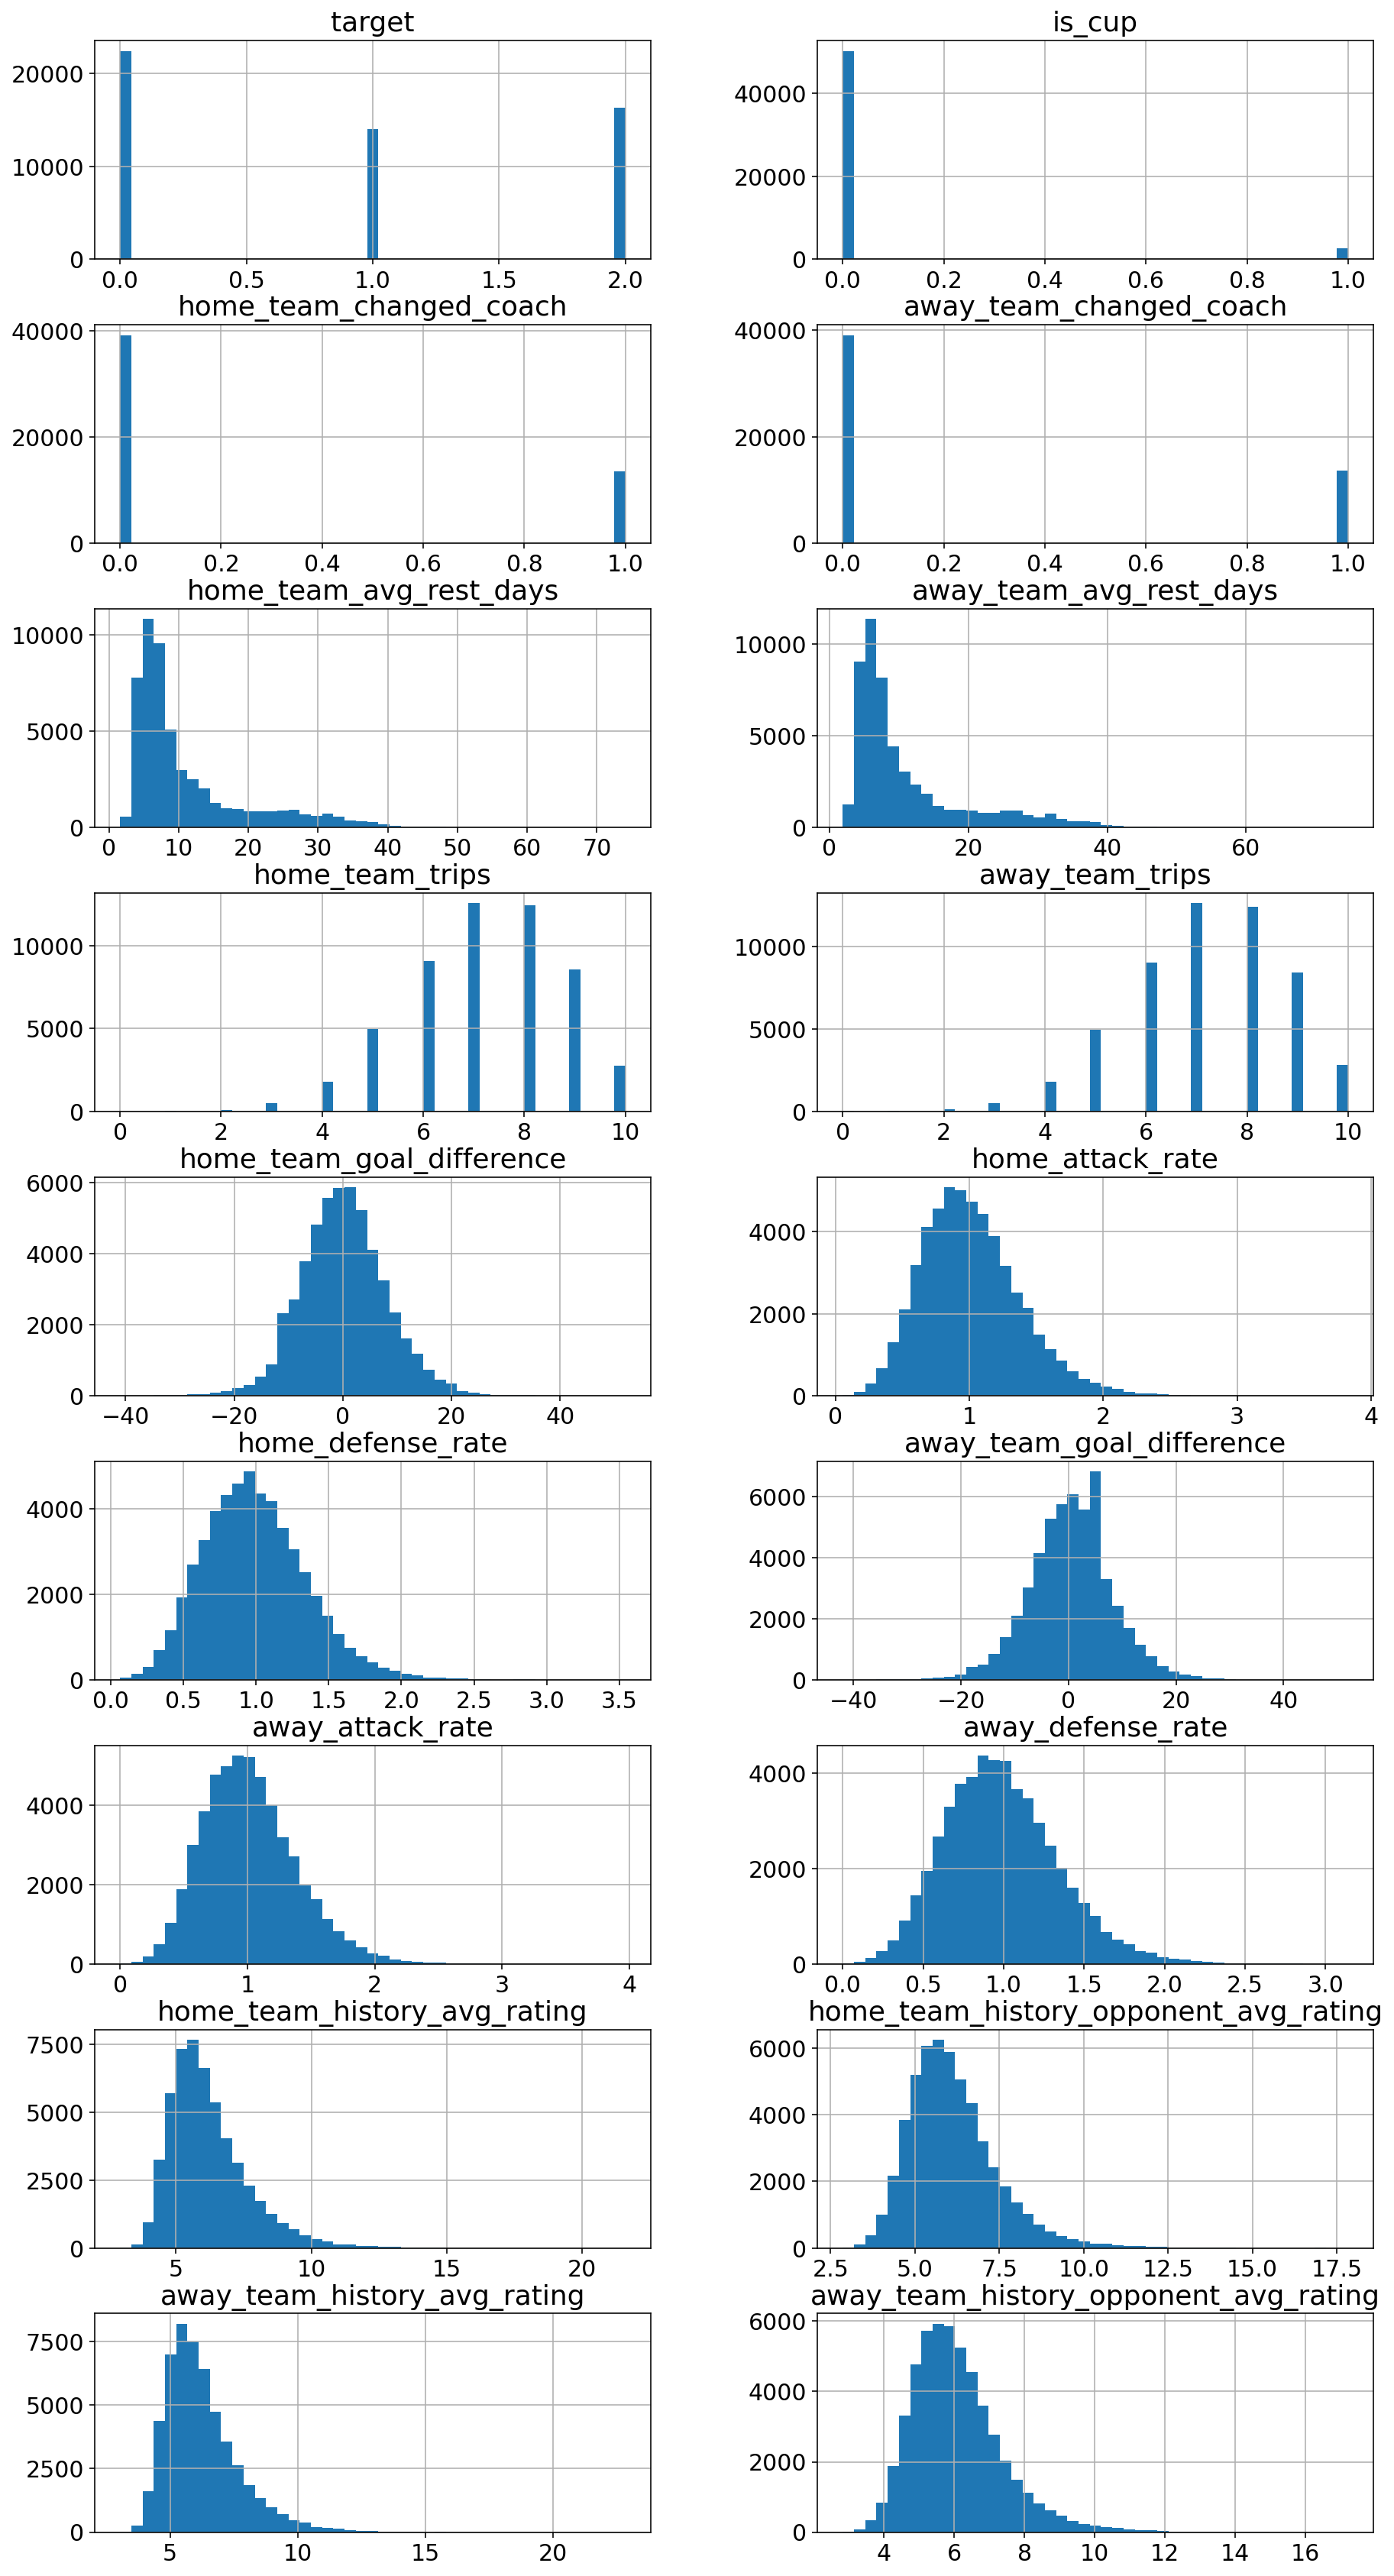

In [20]:
columns = ['target', 'is_cup', 'home_team_changed_coach',
       'away_team_changed_coach', 'home_team_avg_rest_days',
       'away_team_avg_rest_days', 'home_team_trips', 'away_team_trips',
       'home_team_goal_difference', 'home_attack_rate', 'home_defense_rate',
       'away_team_goal_difference', 'away_attack_rate', 'away_defense_rate',
       'home_team_history_avg_rating', 'home_team_history_opponent_avg_rating',
       'away_team_history_avg_rating',
       'away_team_history_opponent_avg_rating']
df[columns].hist(figsize=(15, 30), bins=45, layout=(9,2)) 

#### Feature Correlation

<AxesSubplot:>

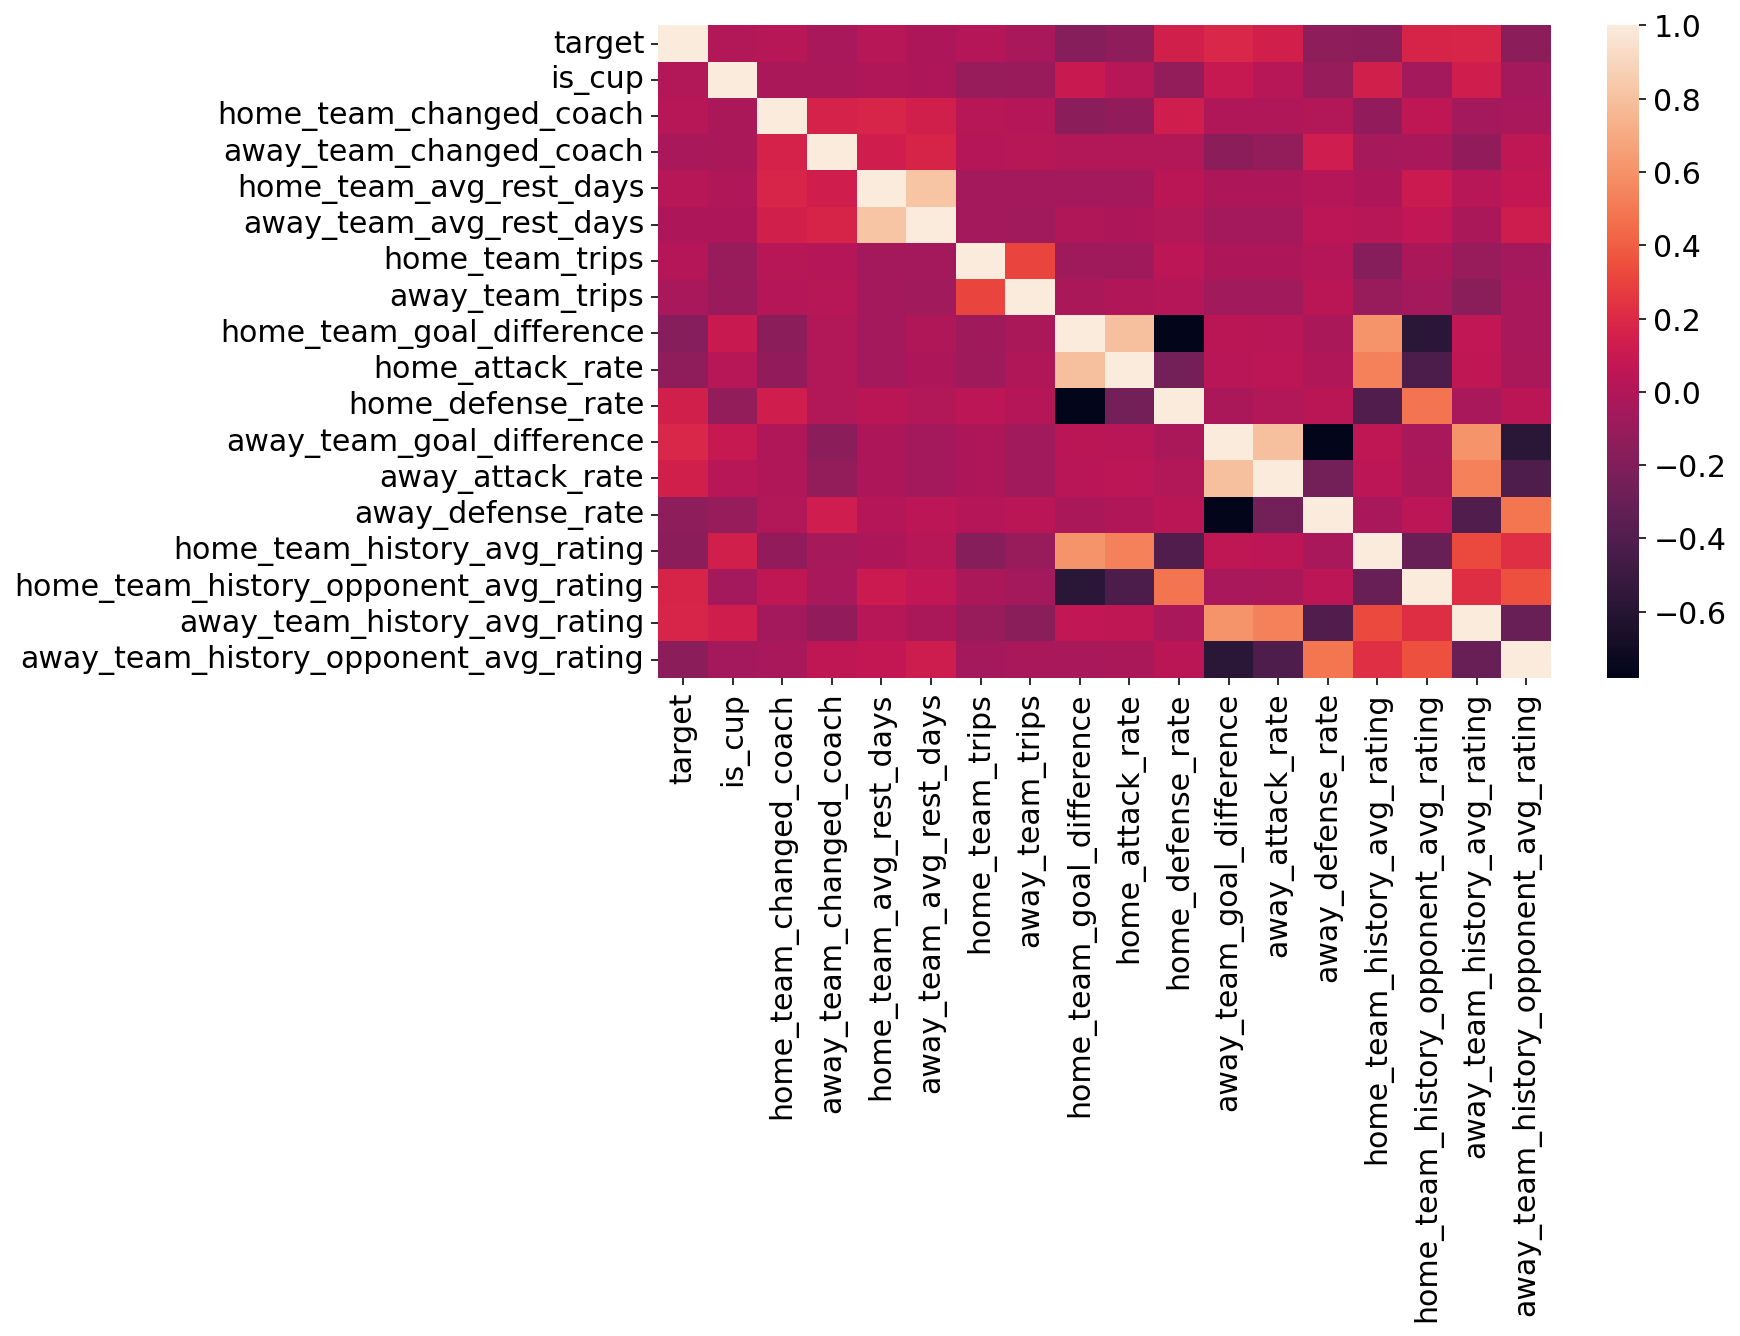

In [21]:
# Correlation Heatmap creation
columns = ['target', 'is_cup', 'home_team_changed_coach',
       'away_team_changed_coach', 'home_team_avg_rest_days',
       'away_team_avg_rest_days', 'home_team_trips', 'away_team_trips',
       'home_team_goal_difference', 'home_attack_rate', 'home_defense_rate',
       'away_team_goal_difference', 'away_attack_rate', 'away_defense_rate',
       'home_team_history_avg_rating', 'home_team_history_opponent_avg_rating',
       'away_team_history_avg_rating',
       'away_team_history_opponent_avg_rating']
corr_df = df[columns]
correlation = corr_df.corr()
# Plot the heatmap 
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

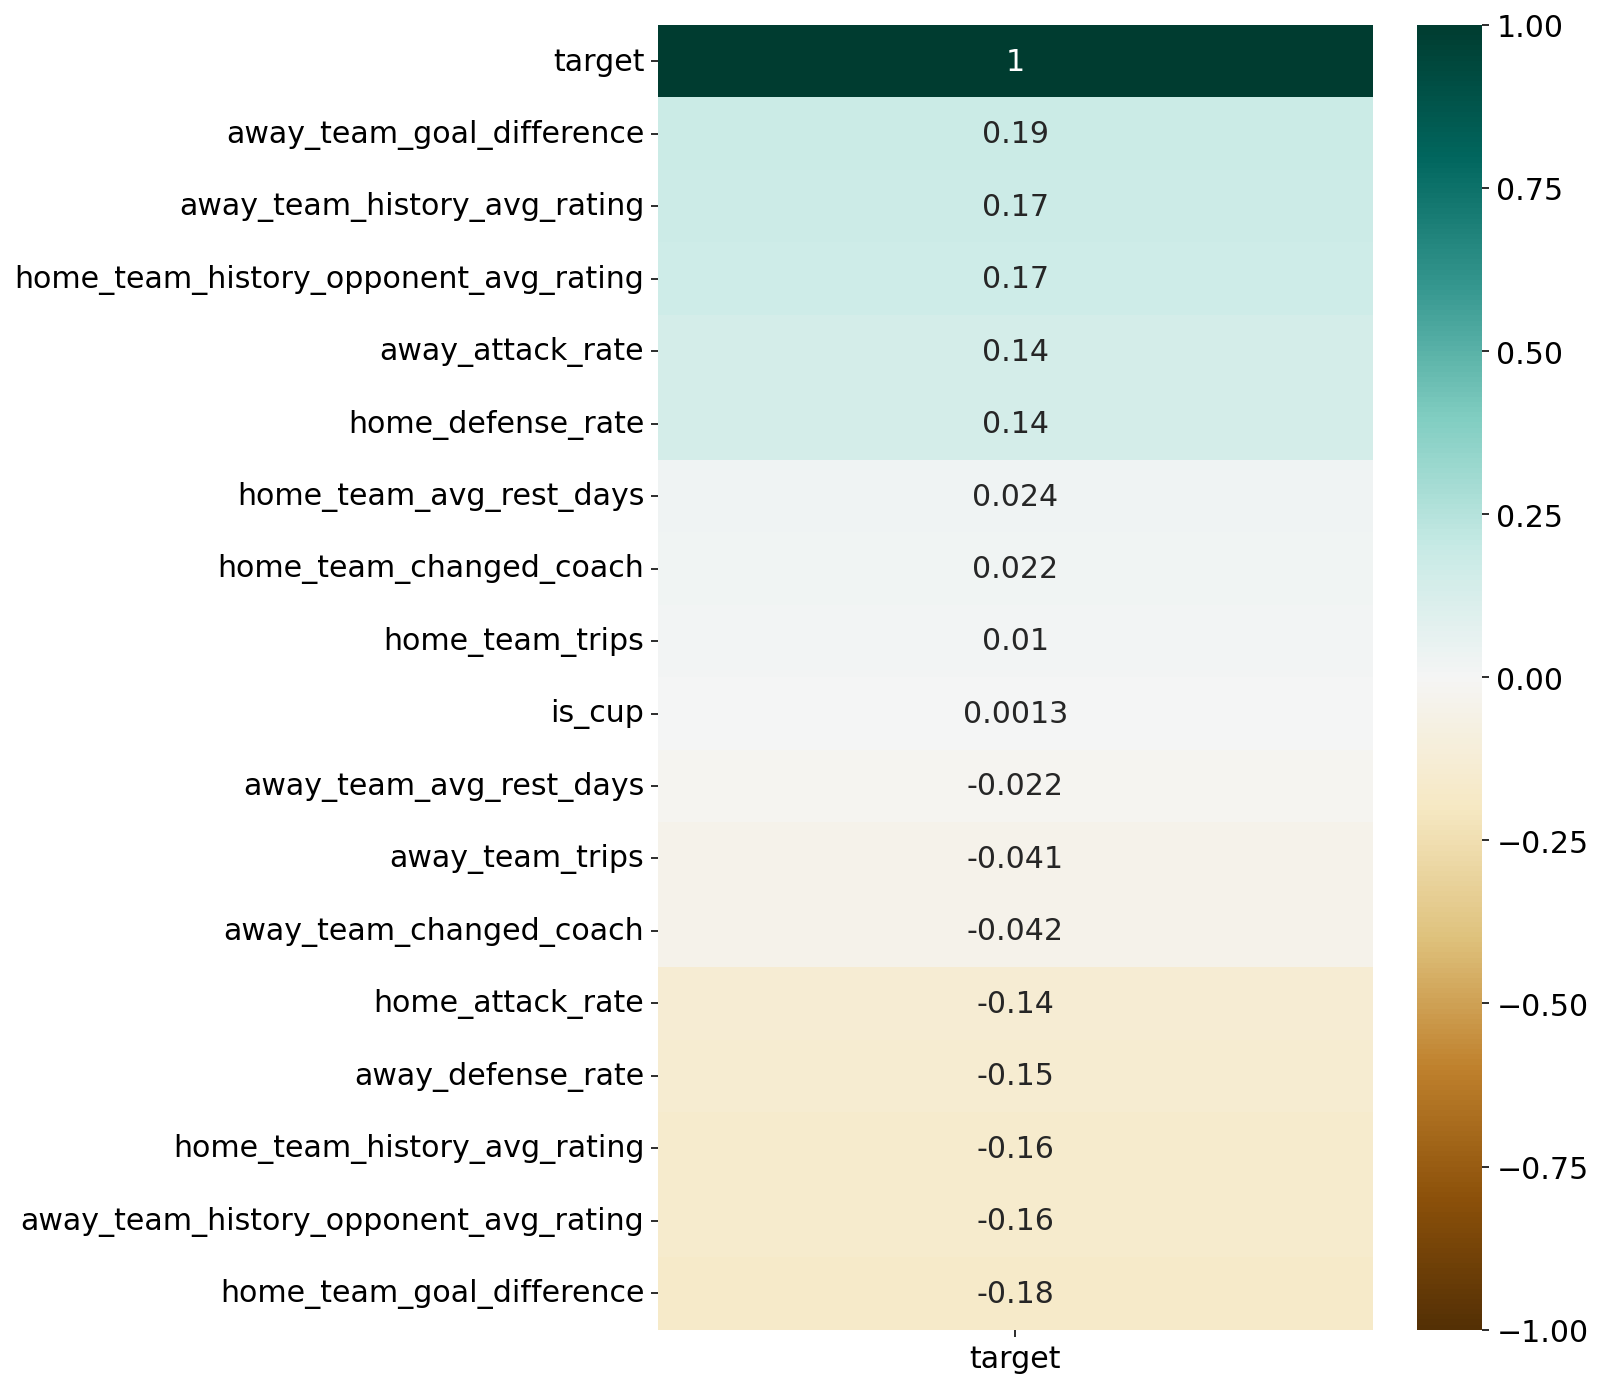

In [22]:
# Used the code available at ref[2] as reference for this part 
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_df.corr()[['target']].sort_values(by='target', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [23]:
print(df.columns)
print(len(df.columns))

Index(['id', 'target', 'is_cup', 'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7',
       ...
       'home_team_goal_difference', 'home_attack_rate', 'home_defense_rate',
       'away_team_goal_difference', 'away_attack_rate', 'away_defense_rate',
       'home_team_history_avg_rating', 'home_team_history_opponent_avg_rating',
       'away_team_history_avg_rating',
       'away_team_history_opponent_avg_rating'],
      dtype='object', length=119)
119


# Random Forest Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1), df['target'], test_size=0.3)

# Save ids for the testing set for further investigation and then remove id from the dataset
X_train = X_train.drop("id",1)
test_ids = X_test.id.tolist()
X_test = X_test.drop("id",1)

robust_scaler = RobustScaler()
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

/tmp/ipykernel_1002966/3587446058.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1), df['target'], test_size=0.3)
/tmp/ipykernel_1002966/3587446058.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop("id",1)
/tmp/ipykernel_1002966/3587446058.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop("id",1)


In [26]:
regr = RandomForestClassifier()
parameters = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 4, 5]}
grid = GridSearchCV(estimator=regr, param_grid = parameters, cv = 2)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 5, 'n_estimators': 150}


In [27]:
clf = RandomForestClassifier(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
class_names = ['Home', 'Draw', "Away"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Home       0.48      0.87      0.62      6777
        Draw       0.00      0.00      0.00      4189
        Away       0.49      0.35      0.41      4872

    accuracy                           0.48     15838
   macro avg       0.32      0.41      0.34     15838
weighted avg       0.36      0.48      0.39     15838



/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Save scores for comparison
cv = KFold(n_splits=5, shuffle=True)
regr = RandomForestClassifier(max_depth=5,n_estimators=100)
rf_score = cross_val_score(regr, df.drop('target',1), df['target'], scoring='accuracy', cv=cv)
print(rf_score)

/tmp/ipykernel_1002966/4052252781.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_score = cross_val_score(regr, df.drop('target',1), df['target'], scoring='accuracy', cv=cv)


[0.48375793 0.4815797  0.46703921 0.47111195 0.48351961]


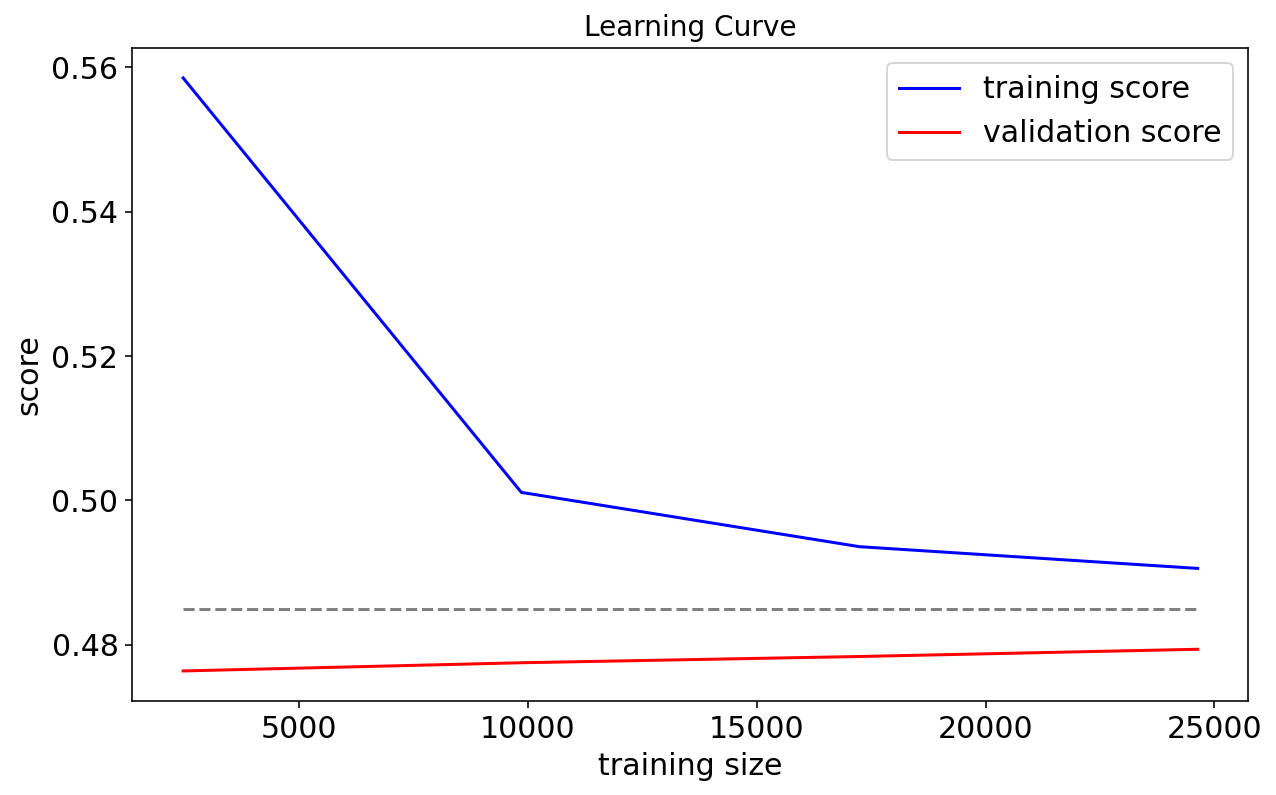

In [29]:
# Used tutorial 3 as reference for this part ref[3]
N, train_lc, val_lc = learning_curve(RandomForestClassifier(max_depth=5,n_estimators=100),
                                         X_train, y_train, cv=3,
                                         train_sizes=np.linspace(0.1, 1, num=4))

plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

plt.xlabel('training size')
plt.ylabel('score')
plt.title('Learning Curve', size=14)
plt.legend(loc='best')

/home/kvasir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


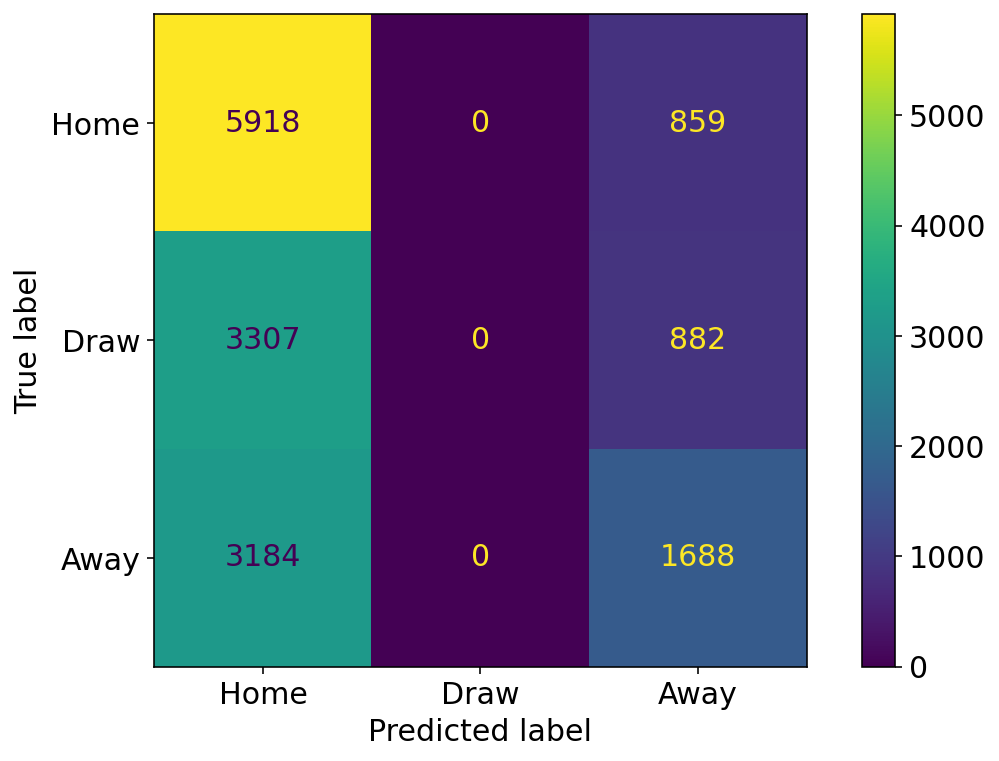

In [30]:
class_names = ['Home', 'Draw', "Away"]
plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, values_format = '.0f')
plt.show()

#### Exploring some of the missclassified instances

In [31]:
print(len(y_pred))
print(len(test_ids))
wrong_preds = []
for i in range(len(y_pred)):
    pred = y_pred[i]
    true = y_test.iloc[i]
    match_id = test_ids[i]
    
    if( (pred==0 and true==2) or (pred==2 and true==0)):
        wrong_preds.append(match_id)

main_leagues = ['Premier League', 'Primera Division', 'Super League', '3. Liga', 
               'Ligue 1', 'Championship', 'League One', 'Superliga', 'Serie A']
teams = ["Internacional", "Barcelona", "Real Madrid", "Manchester City", "Liverpool", 
         "Flamengo", "Bayern Munich", "Chelsea", "Milan", "Inter", "Paris Saint Germain"]
wrong_matches = df_original[df_original['id'].isin(wrong_preds)]
wrong_matches = wrong_matches[wrong_matches["league_name"].isin(main_leagues)]
wrong_matches = wrong_matches[wrong_matches["home_team_name"].isin(teams) | wrong_matches["away_team_name"].isin(teams)  ]
wrong_matches.head(30)

15838
15838


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

### Building model without created features in order to test their effect

Index(['is_cup', 'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7',
       'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9',
       ...
       'away_team_history_opponent_rating_1',
       'away_team_history_opponent_rating_2',
       'away_team_history_opponent_rating_3',
       'away_team_history_opponent_rating_4',
       'away_team_history_opponent_rating_5',
       'away_team_history_opponent_rating_6',
       'away_team_history_opponent_rating_7',
       'away_team_history_opponent_rating_8',
       'away_team_history_opponent_rating_9',
       'away_team_history_opponent_rating_10'],
      dtype='object', length=101)


/tmp/ipykernel_1002966/2075273447.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train2, X_test2, y_train2, y_test2 = train_test_split(df.drop(columns,1), df['target'], test_size=0.3)
/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kvasir/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.p

              precision    recall  f1-score   support

        Home       0.46      0.92      0.61      6724
        Draw       0.00      0.00      0.00      4131
        Away       0.52      0.26      0.34      4983

    accuracy                           0.47     15838
   macro avg       0.33      0.39      0.32     15838
weighted avg       0.36      0.47      0.37     15838



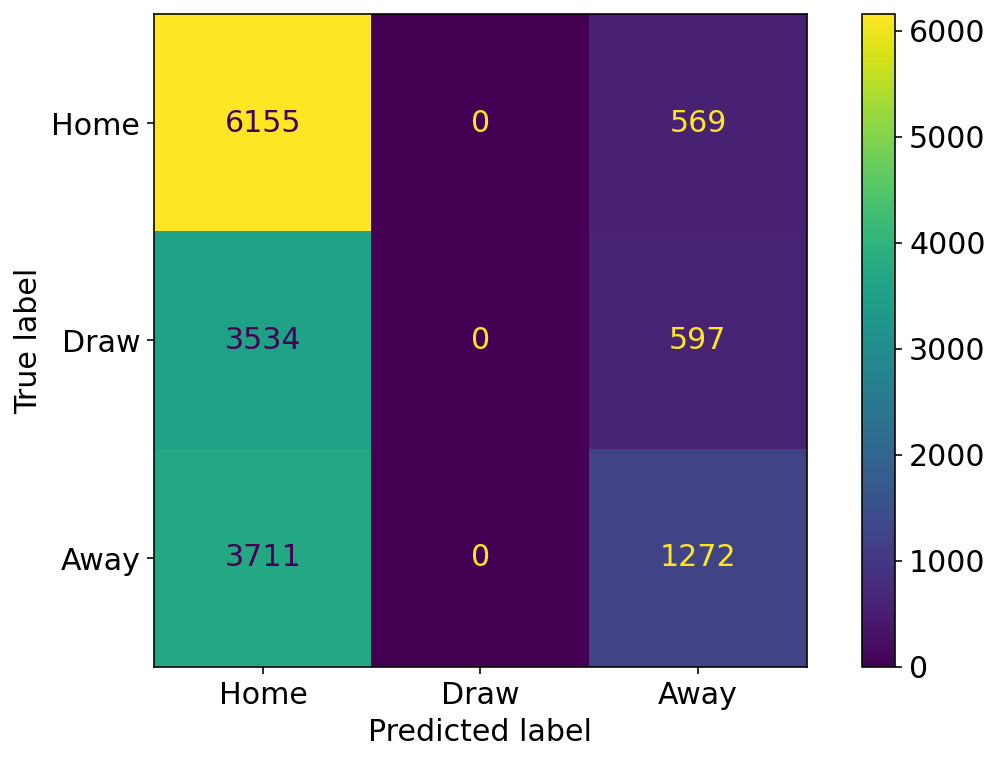

In [32]:
columns = ['target','id','home_team_changed_coach', 'away_team_changed_coach', 'home_team_avg_rest_days',
       'away_team_avg_rest_days', 'home_team_trips', 'away_team_trips',
       'home_team_goal_difference', 'home_attack_rate', 'home_defense_rate',
       'away_team_goal_difference', 'away_attack_rate', 'away_defense_rate',
       'home_team_history_avg_rating', 'home_team_history_opponent_avg_rating',
       'away_team_history_avg_rating', 'away_team_history_opponent_avg_rating']

X_train2, X_test2, y_train2, y_test2 = train_test_split(df.drop(columns,1), df['target'], test_size=0.3)
print(X_train2.columns)

robust_scaler2 = RobustScaler()
X_train2 = robust_scaler2.fit_transform(X_train2)
X_test2 = robust_scaler2.transform(X_test2)

clf = RandomForestClassifier(max_depth=5,n_estimators=100)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
class_names = ['Home', 'Draw', "Away"]
print(classification_report(y_test2, y_pred2, target_names=class_names))
plot_confusion_matrix(clf, X_test2, y_test2, display_labels=class_names, values_format = '.0f')
plt.show()

In [33]:
cv = KFold(n_splits=5, shuffle=True)
regr = RandomForestClassifier(max_depth=5,n_estimators=100)
rf_no_vars_score = cross_val_score(regr, df.drop(columns,1), df['target'], scoring='accuracy', cv=cv)
print(rf_no_vars_score)

/tmp/ipykernel_1002966/3100295939.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_no_vars_score = cross_val_score(regr, df.drop(columns,1), df['target'], scoring='accuracy', cv=cv)


[0.46945733 0.4753291  0.46798636 0.47310097 0.46770222]


Ttest_indResult(statistic=-1.7641422380285103, pvalue=0.11571443359667465)


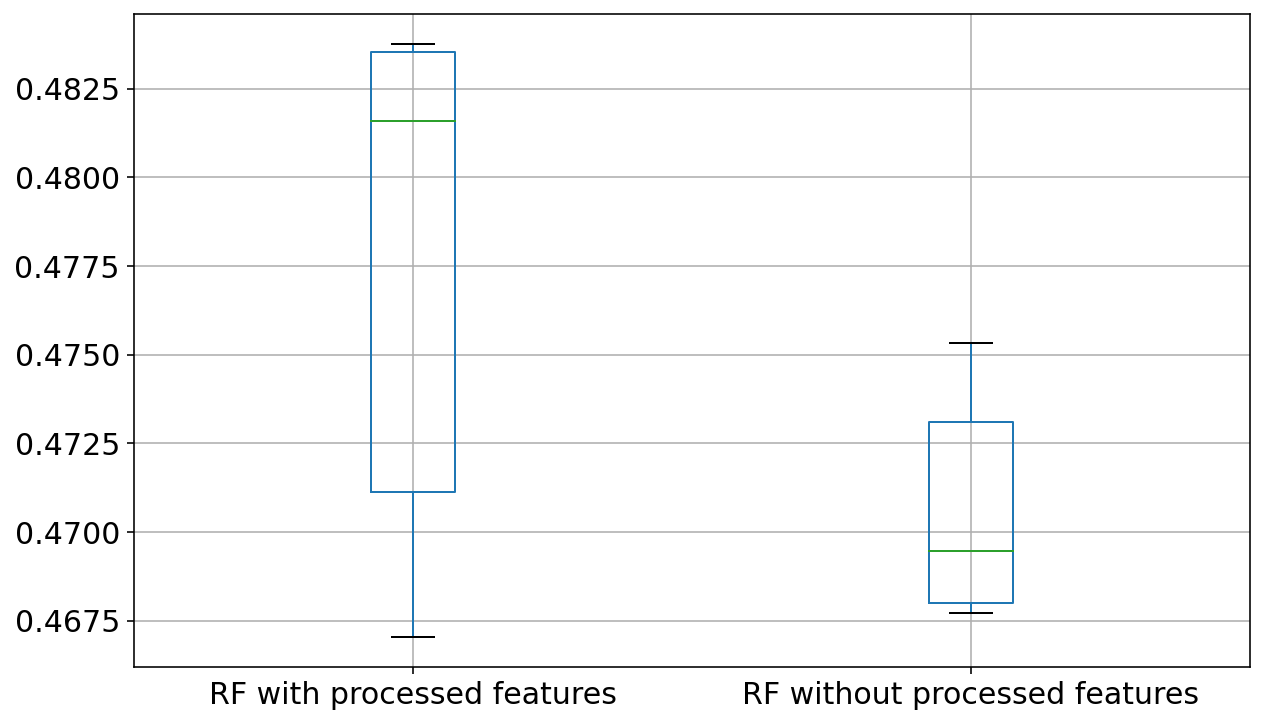

In [34]:
boxplot_comp = pd.DataFrame(np.array([rf_score,rf_no_vars_score]).T, columns=["RF with processed features","RF without processed features"])
boxplot_comp.boxplot()
# Used the code available at ref[4] as reference for this part 
val = stats.ttest_ind(a=rf_no_vars_score, b=rf_score, equal_var=True)
print(val)

# Neural Network Model

In [35]:
#taken from tutorial 7 ref[5]
class NN(torch.nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size):
    """
    In the constructor we instantiate three nn.Linear modules and assign them as
    member variables.
    """
    super(NN, self).__init__()

    # Create the first layer and the activation function
    self.hidden_layer_1   = nn.Linear(input_size, hidden_sizes[0])
    self.activation_fn_1  = nn.ReLU()

    # Create the first layer and the activation function
    self.hidden_layer_2   = nn.Linear(hidden_sizes[0], hidden_sizes[1])
    self.activation_fn_2  = nn.ReLU()
    
    # Create the output layer and the activation function
    self.output_layer     = nn.Linear(hidden_sizes[1], output_size)
    self.activation_fn_5  = nn.LogSoftmax(dim=1)
    
  def forward(self, x):
    """
    In the forward function we accept a Tensor of input data and we must return
    a Tensor of output data. We can use Modules defined in the constructor as
    well as arbitrary (differentiable) operations on Tensors.
    """
    # Pass through the first layer
    out = self.hidden_layer_1(x)
    out = self.activation_fn_1(out)
    
    out = self.hidden_layer_2(out)
    out = self.activation_fn_2(out)
    
    # Pass through the output layer
    out = self.output_layer(out)
    y_pred = self.activation_fn_5(out)
    #y_pred = self.activation_output(out)
    
    return y_pred

In [36]:
# Convert dataset into pytorch train loader
# Used the code available at ref[6] as reference for this part 
batch_size = 32

train_target = torch.tensor(y_train.values.astype(np.float32))
train = torch.tensor(X_train.astype(np.float32)) 
train_tensor = data_utils.TensorDataset(train, train_target) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

test_target = torch.tensor(y_test.values.astype(np.float32))
test = torch.tensor(X_test.astype(np.float32)) 
test_tensor = data_utils.TensorDataset(test, test_target) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = True)

In [37]:
#taken from tutorial 7 ref[5]
def train_model(model, optimizer, train_loader, epochs):
    loss_fn = nn.NLLLoss()
    losses = []
    for e in range(epochs):
        running_loss = 0
        for features, labels in train_loader:
            #labels = labels.unsqueeze(1)

            optimizer.zero_grad()

            pred = model(features)
            loss = loss_fn(pred, labels.long())

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
        if(e%10==0):
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
        losses.append(running_loss/len(train_loader))
    return losses
            

In [38]:
def test_model(model,test_loader):
    all_preds = []
    all_labels = []
    for features, labels in test_loader:   
        # get model model prediction
        with torch.no_grad():
            model_output = model(features)
        y_pred = torch.argmax(model_output, axis=1)
        all_preds.extend(y_pred)
        all_labels.extend(labels)

    print(classification_report(all_labels, all_preds, target_names=class_names))
    labels = ['Home', 'Draw', "Away"]
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()
    plt.show()

In [39]:
input_size = 117
hidden_sizes = [50,25]
output_size = 3

model = NN(input_size, hidden_sizes, output_size)
epochs = 500
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

losses = train_model(model, optimizer, train_loader, epochs)

print("Model structure:\n", model)

Epoch 0 - Training loss: 1.0336379720019055
Epoch 10 - Training loss: 0.9879315665273956
Epoch 20 - Training loss: 0.9437131979248741
Epoch 30 - Training loss: 0.9098172214640168
Epoch 40 - Training loss: 0.8846482615966301
Epoch 50 - Training loss: 0.8683591798270419
Epoch 60 - Training loss: 0.8546364908610588
Epoch 70 - Training loss: 0.8442857546723767
Epoch 80 - Training loss: 0.836130002205506
Epoch 90 - Training loss: 0.8280332590852465
Epoch 100 - Training loss: 0.8213510748111841
Epoch 110 - Training loss: 0.8170687077365396
Epoch 120 - Training loss: 0.8106496868711529
Epoch 130 - Training loss: 0.8081381747990976
Epoch 140 - Training loss: 0.802655917019039
Epoch 150 - Training loss: 0.8007029864695165
Epoch 160 - Training loss: 0.797968135329036
Epoch 170 - Training loss: 0.7943982879062752
Epoch 180 - Training loss: 0.7917715630231997
Epoch 190 - Training loss: 0.789971928008191
Epoch 200 - Training loss: 0.7894183726537796
Epoch 210 - Training loss: 0.7858667553761305
Epo

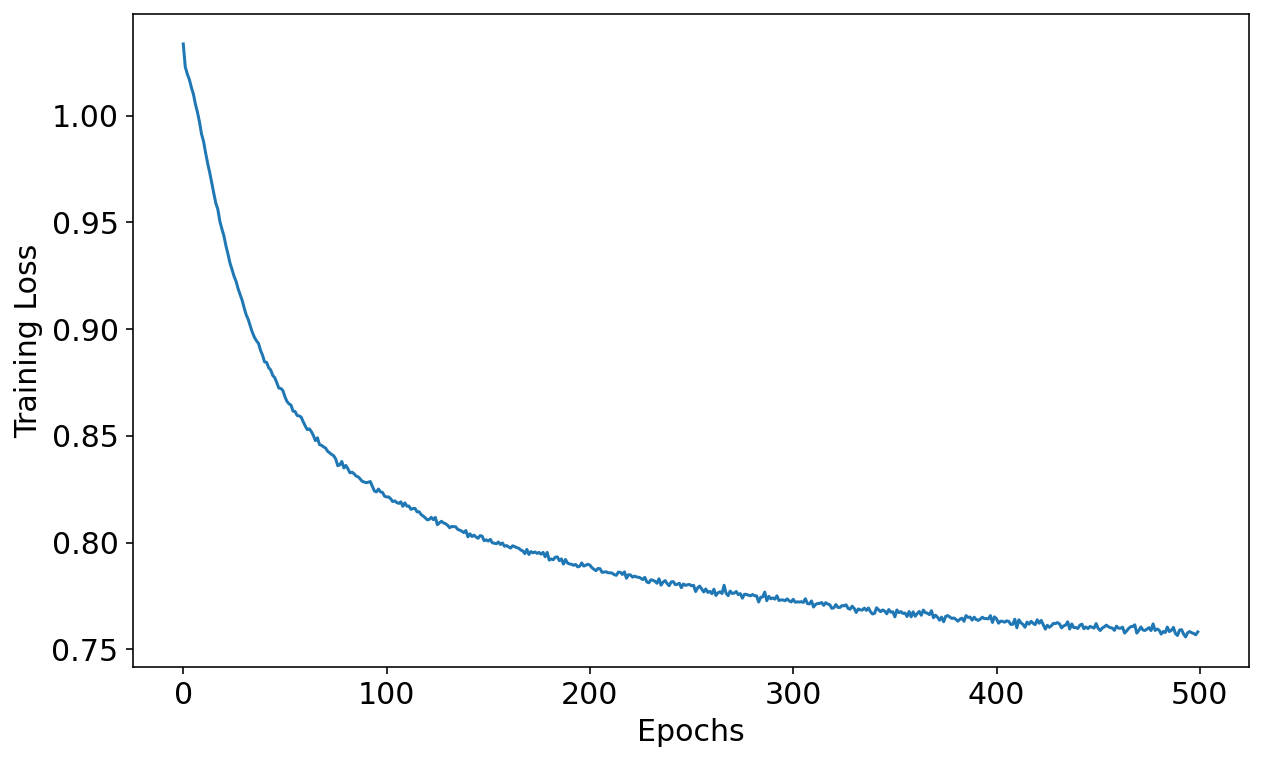

              precision    recall  f1-score   support

        Home       0.48      0.56      0.52      6777
        Draw       0.27      0.22      0.24      4189
        Away       0.39      0.36      0.37      4872

    accuracy                           0.41     15838
   macro avg       0.38      0.38      0.38     15838
weighted avg       0.40      0.41      0.40     15838



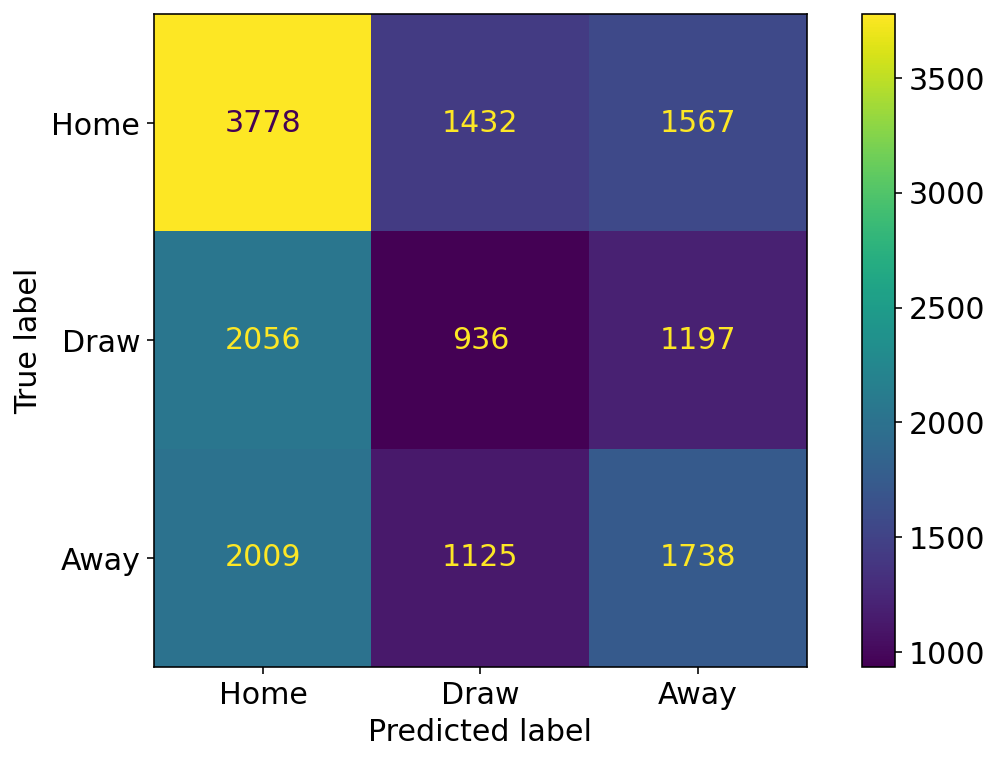

In [40]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()
test_model(model,test_loader)

### References:

1. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3023670/View <a id='3'></a>
2. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e <a id='3'></a>
3. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3028336/View <a id='3'></a>
4. https://www.statology.org/two-sample-t-test-python/  <a id='3'></a>
5. https://dal.brightspace.com/d2l/le/content/221741/viewContent/3048179/View <a id='3'></a>
6.  https://stackoverflow.com/questions/50307707/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor <a id='3'></a>